In [20]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_diabetes
import pandas as pd
df = pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
df['target'] = load_diabetes().target

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
x = df.drop('target', axis=1)
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(x_test)

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

for name, model in models.items():
  model.fit(X_train_scaled, Y_train)
  pred = model.predict(x_test_scaled)

  mae = mean_absolute_error(y_test, pred)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, pred)

  print("\nModel:", name)
  print("MAE :", mae)
  print("MSE :", mse)
  print("RMSE:", rmse)
  print("R²  :", r2)



Model: Linear Regression
MAE : 43.245475552753014
MSE : 2972.8515346999216
RMSE: 54.523862066987896
R²  : 0.43888894168947257

Model: Ridge
MAE : 43.24009941267315
MSE : 2956.2695823331937
RMSE: 54.37158800635856
R²  : 0.4420187033787958

Model: Lasso
MAE : 43.23085209405225
MSE : 2873.4789408050483
RMSE: 53.604840647137905
R²  : 0.4576450284555219

Model: KNN
MAE : 43.4561797752809
MSE : 3111.9829213483144
RMSE: 55.78514964888339
R²  : 0.41262857897197447

Model: SVR
MAE : 56.135965948523776
MSE : 4323.557704098527
RMSE: 65.75376570279855
R²  : 0.18394981696984147

Model: Decision Tree
MAE : 60.640449438202246
MSE : 6087.561797752809
RMSE: 78.02282869617589
R²  : -0.14899725162783972

Model: Random Forest
MAE : 43.83426966292135
MSE : 3000.4339853932584
RMSE: 54.77621733374128
R²  : 0.433682890220475

Model: Gradient Boosting
MAE : 43.31612525945927
MSE : 2924.4221010044944
RMSE: 54.077926189939035
R²  : 0.44802975833538816


In [21]:
# --- 1. CREATE UNKNOWN INPUT ROW ---
import numpy as np

x = np.array([0.005383, -0.044642, -0.036385, 0.021872, 0.003935,
              0.015596, 0.008142, -0.002592, -0.031988, -0.046641]).reshape(1, -1)

# --- 2. SCALE UNKNOWN INPUT USING EXISTING SCALER ---
x_new = scaler.transform(x)

# --- 3. PREDICT USING ALL MODELS ---
print("=== PREDICTIONS FOR UNKNOWN X ===\n")

for name, model in models.items():
    pred = model.predict(x_new)
    print(f"{name}: {pred[0]}")


=== PREDICTIONS FOR UNKNOWN X ===

Linear Regression: 141.81188015623522
Ridge: 141.789952905687
Lasso: 139.7065338536454
KNN: 119.4
SVR: 133.05271799978797
Decision Tree: 135.0
Random Forest: 116.25
Gradient Boosting: 114.82647465414138


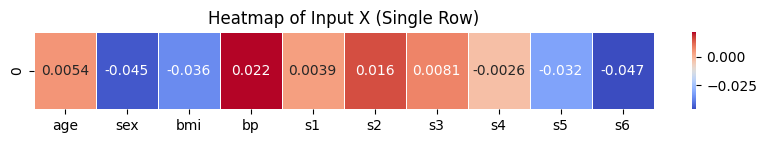

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# x list must match the 10 feature names
x = [0.005383, -0.044642, -0.036385, 0.021872, 0.003935,
     0.015596, 0.008142, -0.002592, -0.031988, -0.046641]

# Convert to dataframe with feature names
# Use the 'feature_names' variable, which holds the list of column names
x_df = pd.DataFrame([x], columns=feature_names)

# Plot heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(x_df, annot=True, cmap="coolwarm", cbar=True, linewidths=.5)
plt.title("Heatmap of Input X (Single Row)")
plt.show()